<a href="https://colab.research.google.com/github/VasundharaC/sturdy-bassoon/blob/main/KaggleAccidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#install Kaggle
! pip install -q kaggle

In [19]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"vasundhara3","key":"fe7f54818fcd7502d22d10684727b58e"}'}

In [21]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [22]:
! cp kaggle.json ~/.kaggle/

In [24]:
! kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           9785        324  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           8248        202  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:26:03            707         42  1.0              
anas123siddiqui/mobiles                                    Mobiles                                      59KB  2023-02-18 16:3

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [25]:
! kaggle datasets download -d sobhanmoosavi/us-accidents


 95% 256M/269M [00:02<00:00, 109MB/s]
100% 269M/269M [00:02<00:00, 108MB/s]


In [26]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec21_updated.csv  


In [2]:
# Importing all necessary libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/US_Accidents_Dec21_updated.csv")

In [30]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [56]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [42]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

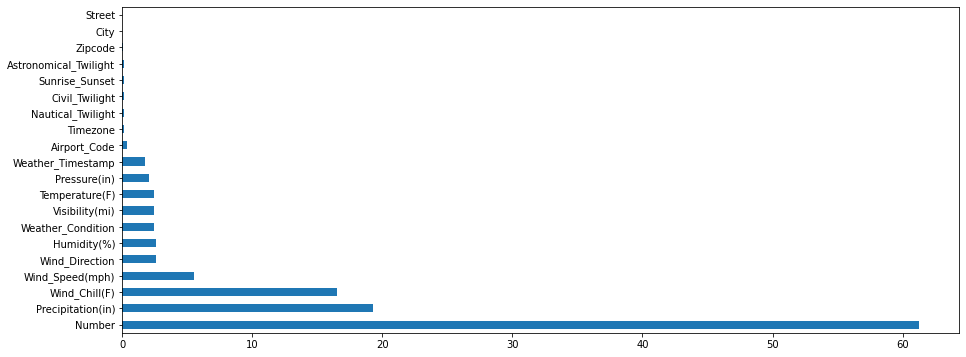

In [55]:
missing=df.isnull().sum().sort_values(ascending=False)/len(df) * 100
plt.figure(figsize=(15,6))
missing[missing!=0].plot(kind="barh")
plt.show()

Since Number contains more than 60% of missing data, so remove it

In [8]:
df.drop(columns={"Number"}, inplace=True)

In [9]:
df.dropna(inplace=True)

<AxesSubplot:>

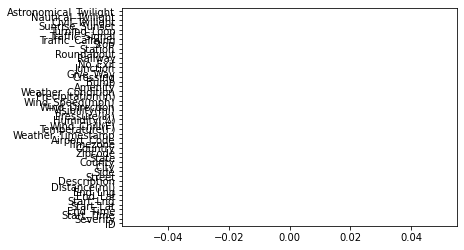

In [10]:
df.isnull().sum().plot(kind="barh")

Show accidents by state

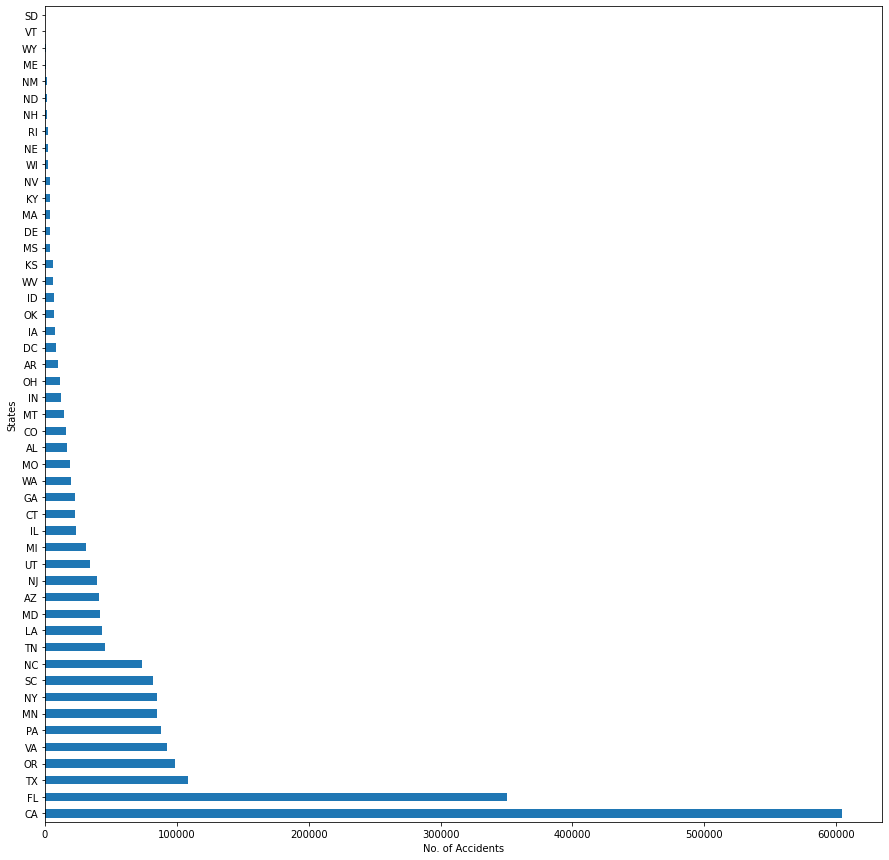

In [72]:
statedf=df.State.value_counts()
plt.figure(figsize=(15,15))
statedf.plot(kind="barh")
plt.xlabel("No. of Accidents")
plt.ylabel("States")
plt.show()

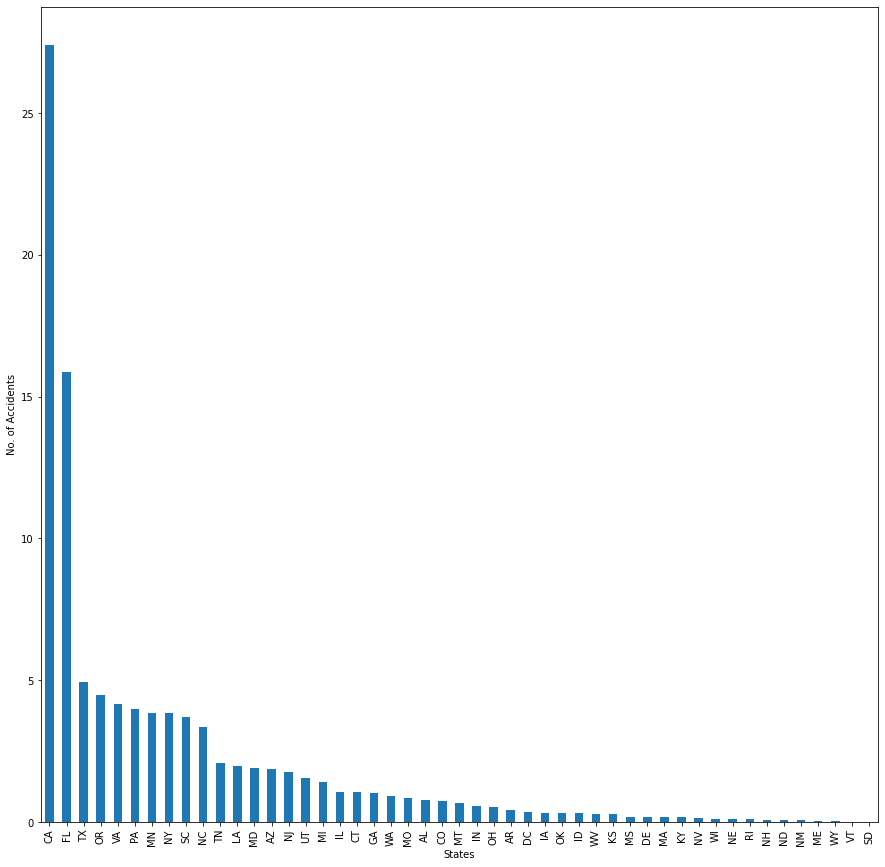

In [73]:
statedf1=statedf/len(df)*100
plt.figure(figsize=(15,15))
statedf1.plot(kind="bar")
plt.ylabel("No. of Accidents")
plt.xlabel("States")
plt.show()

Accident count by top 20 cities

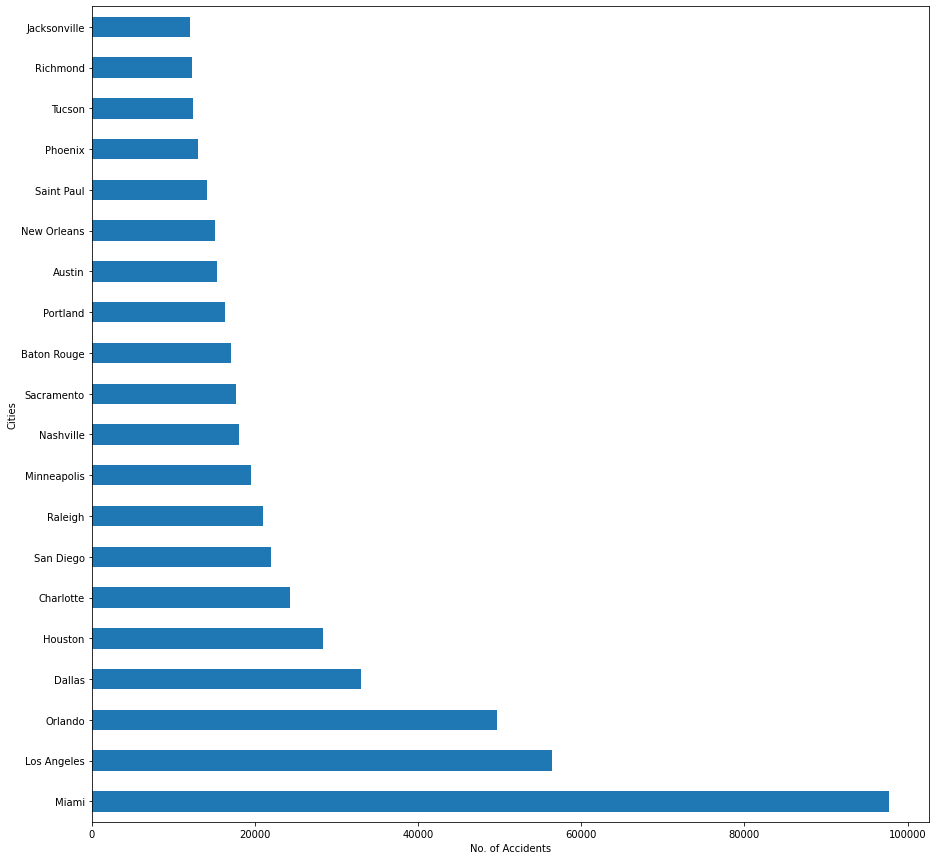

In [80]:
citydf=df.City.value_counts()
plt.figure(figsize=(15,15))
citydf[:20].plot(kind="barh")
plt.xlabel("No. of Accidents")
plt.ylabel("Cities")
plt.show()

Severity levels of accidents for IL state

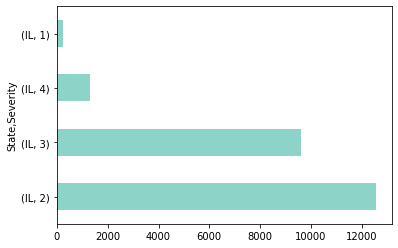

In [85]:
def chooseState(state):
    severity_data = df.loc[df['State']==state].groupby('State')['Severity'].value_counts()
    return severity_data
x = 'IL'

chooseState(x).plot(kind='barh', colormap='Set3')
plt.show()

Most accidents are of severity level 2

<AxesSubplot:xlabel='Accident count', ylabel='Severity'>

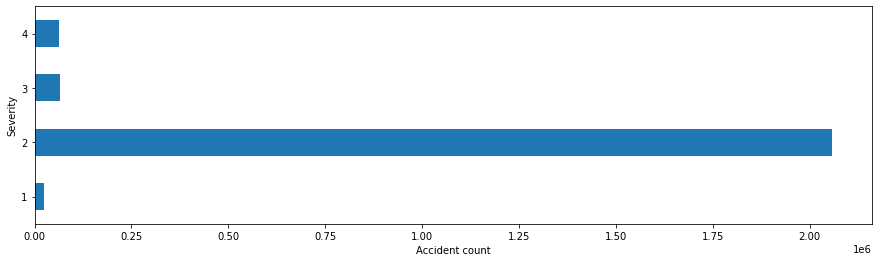

In [11]:
plt.figure(figsize=(15,4))
plt.xlabel("Accident count")
df.groupby("Severity").size().plot(kind="barh")

Top 20 zipcodes with max severity of Accidents

<AxesSubplot:xlabel='Zipcode,Severity'>

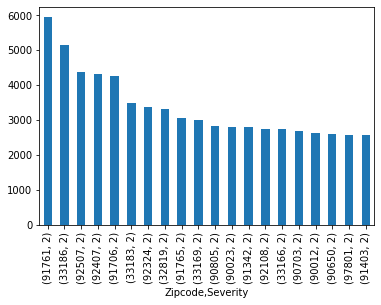

In [5]:
zipdf= df['ID'].groupby([df["Zipcode"],df["Severity"]]).count().sort_values(ascending=False)
zipdf[0:20].plot(kind="bar")

<Figure size 36000x36000 with 0 Axes>

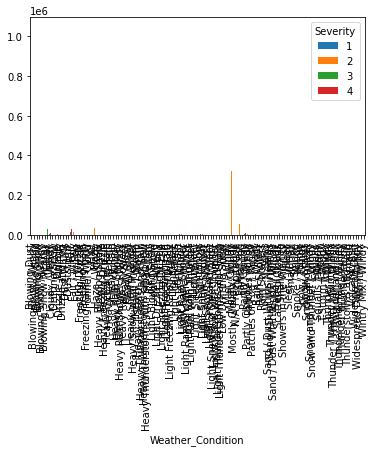

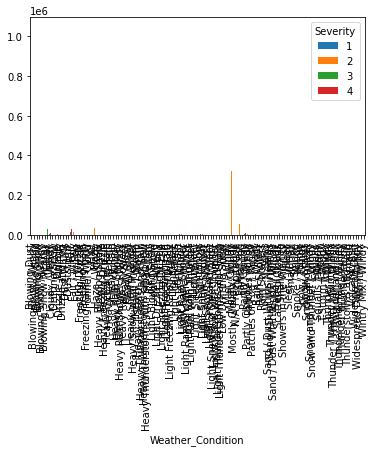

In [16]:
# Solving question 3: accident cases affected by weather condition
weather_acci = df['ID'].groupby([df['Weather_Condition'],df['Severity']]).count()
weather_acci = weather_acci.unstack(level=-1).fillna(0)

data=weather_acci
plt.figure(figsize=(500,6))
data.plot(kind="bar")
plt.show()